# Neural Network

In [75]:
#Importing Tensorflow
import tensorflow as tf
import numpy as np

In [76]:
#Defining the network
n_features = 10
n_dense_neurons = 3

In [77]:
#Creating the first placeholder for the network
x = tf.placeholder(tf.float32, (None, n_features))

In [78]:
#Creating the layer
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [79]:
#Baises for the layer
b = tf.ones([n_dense_neurons])

In [80]:
#Getting a the output for that layer
xW = tf.matmul(x,W)
z = tf.add(xW,b)

In [81]:
#Setting Activation Function
a = tf.sigmoid(z)

In [82]:
init = tf.global_variables_initializer()

In [83]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
    

In [84]:
print(layer_out)

[[0.77487546 0.30648053 0.89328414]]


# Simple Regression Problem

In [85]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [86]:
x_data

array([ 0.16045747,  0.52496901,  3.46617146,  2.75352898,  4.79715619,
        4.29673252,  7.38963036,  8.03310491,  7.41414081, 10.02325235])

In [87]:
y_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [88]:
y_data

array([ 1.04741652, -0.33001357,  3.61343165,  4.34454166,  3.48064948,
        6.67077595,  7.70601836,  7.9388712 , 10.09328653, 10.00059873])

In [89]:
import matplotlib.pyplot as plt

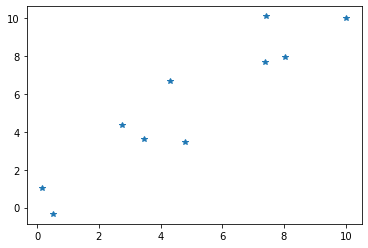

In [90]:
plt.plot(x_data, y_data, '*')

y = mx + b

In [91]:
rand = np.random.rand(2)
rand

array([0.42124944, 0.99663926])

In [92]:
# Setting M a=and b to random values
M = tf.Variable(rand[0])
b = tf.Variable(rand[1])

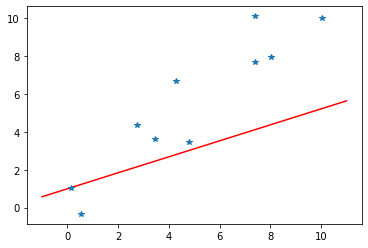

In [93]:
#Graphing the line with random values and our data
x = np.linspace(-1,11,10)
y = rand[0] * x + rand[1]
plt.plot(x,y,'r')
plt.plot(x_data, y_data, '*')

In [94]:
#Calculating Error
error = 0

for x,y in zip(x_data, y_data):
    
    y_hat = M*x + b
    error = (y-y_hat)**2

In [95]:
#Setting up the Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [96]:
# Always Initialize globale variable
init = tf.global_variables_initializer()

In [97]:
#Run the the Session and train it by how many train_step
with tf.Session() as sess:
    sess.run(init)
    
    train_step = 100
    
    for _ in range(train_step):
        sess.run(train)
    
    m_final, b_final = sess.run([M, b])

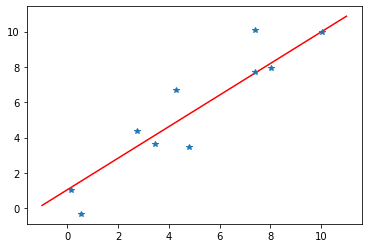

In [98]:
#Graphing the results
x_test = np.linspace(-1,11,10)
y_test = m_final * x_test + b_final
plt.plot(x_test,y_test,'r')
plt.plot(x_data,y_data,'*')